In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.image as image
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, fixed , interact_manual , IntSlider
import ipywidgets as widgets

In [3]:
plt.rcParams['figure.figsize']=(20,12)

In [4]:
img = io.imread('images/1-Saint-Basils-Cathedral.jpg')

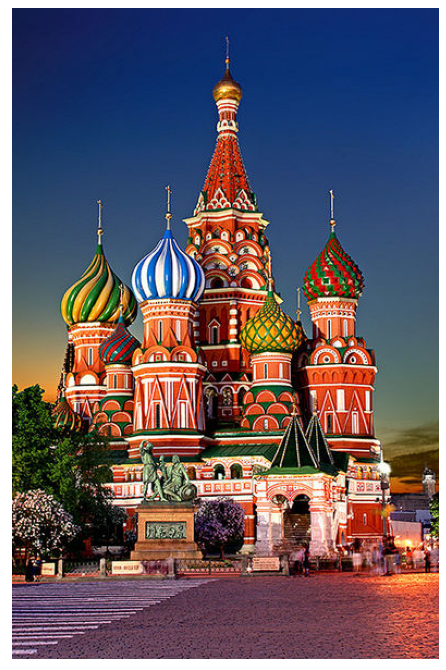

In [5]:
ax = plt.axes(xticks=[] , yticks=[])
ax.imshow(img);

In [6]:
img.shape

(600, 394, 3)

In [7]:
img_data = (img/255.0).reshape(-1,3)
img_data.shape

(236400, 3)

In [8]:
from plot_utils import plot_utils

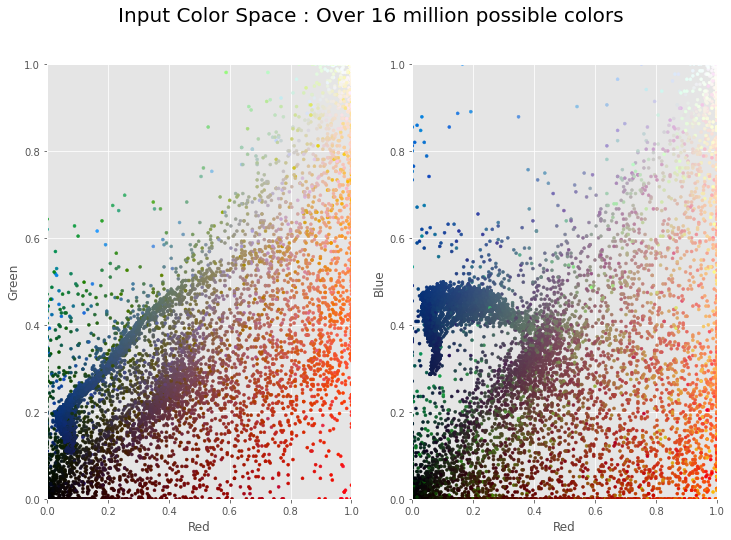

In [9]:
x = plot_utils(img_data , title = 'Input Color Space : Over 16 million possible colors')
x.colorSpace()

In [10]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

In [11]:
y =  plot_utils(img_data , colors=k_colors, title ="Reduce colors space : 16 colors ")

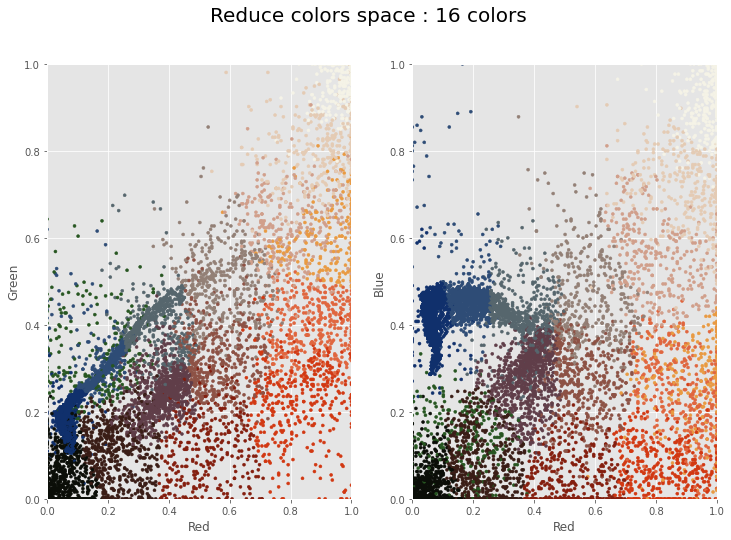

In [12]:
y.colorSpace()

In [13]:
img_dir = 'images/'

In [14]:
@interact
def color_compression(image = os.listdir(img_dir), k = IntSlider(min=1 , max =256 , step =1 , value=16
                                                                 ,continuous_update =False,
                                                                layout = dict(width='100%'))):
    input_img = io.imread(img_dir+image)
    img_data = (input_img/255.0).reshape(-1,3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors =  kmeans.cluster_centers_[kmeans.predict(img_data)]
    k_img = np.reshape(k_colors, (input_img.shape))  
    
    fig , (ax1,ax2) =  plt.subplots(1,2)
    fig.suptitle("K-means Image Compression", fontsize = 20)
    
    ax1.set_title("Compressed Image")
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title("Original Image (16,777,216 colors) ")
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    
    

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…